In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import math

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error

Using Theano backend.


In [2]:
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("Stock Adjusted Price Historical Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Symbols,GOOGL,AAPL,AMZN
Date,,,
2015-09-21,666.979980,26.531311,548.390015
2015-09-22,653.200012,26.114496,538.400024
2015-09-23,653.289978,26.326353,536.070007
2015-09-24,654.909973,26.482946,533.750000
2015-09-25,640.150024,26.416162,524.250000
...,...,...,...
2018-09-13,1182.140015,55.012730,1989.869995
2018-09-14,1177.979980,54.388279,1970.189941
2018-09-17,1159.829956,52.940132,1908.030029


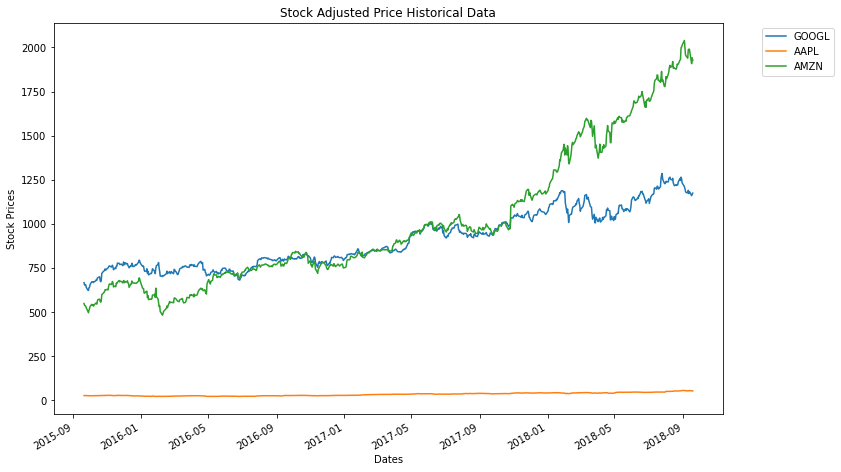

In [3]:
df_1 = multiple_stock_data(ticker=[['GOOGL','AAPL','AMZN']], start='09-19-2015',end='09-19-2018',plot=True, stock_value='Adj Close')
df_1

In [4]:
def single_stock_data(symbol, start,end,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
        return df_single

    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


In [5]:
df = single_stock_data('AMZN', start='2019',end='2021',plot=False,stock_value='Adj Close')
df

Dataframe has 505 rows and 6 columns



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956
...,...,...,...,...,...,...
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000


In [6]:
df_data = pd.read_csv('data/amzn.csv',usecols=[4]).values.astype('float32')
df_data

array([[ 540.26],
       [ 548.39],
       [ 538.4 ],
       [ 536.07],
       [ 533.75],
       [ 524.25],
       [ 504.06],
       [ 496.07],
       [ 511.89],
       [ 520.72],
       [ 532.54],
       [ 543.68],
       [ 537.48],
       [ 541.94],
       [ 533.16],
       [ 539.8 ],
       [ 550.19],
       [ 548.9 ],
       [ 544.83],
       [ 562.44],
       [ 570.76],
       [ 573.15],
       [ 560.88],
       [ 555.77],
       [ 563.91],
       [ 599.03],
       [ 608.61],
       [ 611.01],
       [ 617.1 ],
       [ 626.55],
       [ 625.9 ],
       [ 628.35],
       [ 625.31],
       [ 640.95],
       [ 655.65],
       [ 659.37],
       [ 655.49],
       [ 659.68],
       [ 673.25],
       [ 665.6 ],
       [ 642.35],
       [ 647.81],
       [ 643.3 ],
       [ 663.54],
       [ 661.27],
       [ 668.45],
       [ 678.99],
       [ 671.15],
       [ 675.34],
       [ 673.26],
       [ 664.8 ],
       [ 679.06],
       [ 676.01],
       [ 666.25],
       [ 672.64],
       [ 6

In [7]:
def delta_time_series(data):
    return data[1:]- data[:-1]

In [8]:
dataset_delta_AMAZN = delta_time_series(df_data)
dataset_delta_AMAZN

array([[ 8.13000488e+00],
       [-9.98999023e+00],
       [-2.33001709e+00],
       [-2.32000732e+00],
       [-9.50000000e+00],
       [-2.01900024e+01],
       [-7.98999023e+00],
       [ 1.58200073e+01],
       [ 8.82995605e+00],
       [ 1.18200073e+01],
       [ 1.11400146e+01],
       [-6.20001221e+00],
       [ 4.46002197e+00],
       [-8.78002930e+00],
       [ 6.64001465e+00],
       [ 1.03900146e+01],
       [-1.28997803e+00],
       [-4.07000732e+00],
       [ 1.76099854e+01],
       [ 8.32000732e+00],
       [ 2.39001465e+00],
       [-1.22700195e+01],
       [-5.10998535e+00],
       [ 8.13995361e+00],
       [ 3.51200562e+01],
       [ 9.57995605e+00],
       [ 2.40002441e+00],
       [ 6.08996582e+00],
       [ 9.45001221e+00],
       [-6.49963379e-01],
       [ 2.44995117e+00],
       [-3.03997803e+00],
       [ 1.56400146e+01],
       [ 1.47000122e+01],
       [ 3.71997070e+00],
       [-3.88000488e+00],
       [ 4.19000244e+00],
       [ 1.35700073e+01],
       [-7.6

In [9]:
df_data.shape

(756, 1)

In [10]:
def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('close')
    plt.show()

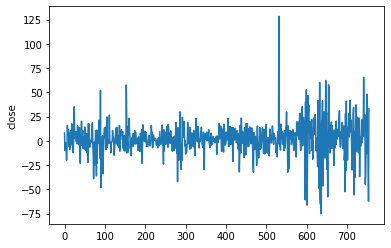

In [11]:
plot_delta(df_data)

In [12]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [13]:
def binary_accuracy(a, b):
    '''
    Helper function to compute the match score of two 
    binary numpy arrays.
    '''
    assert len(a) == len(b)
    return (a == b).sum() / len(a)

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset_delta_AMAZN)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [15]:
train.shape, test.shape, 

((505, 1), (250, 1))

In [16]:
look_back = 3

In [17]:
train_data_gen = TimeseriesGenerator(train, train,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [18]:
test_data_gen = TimeseriesGenerator(test, test,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=1)

In [19]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history = model.fit_generator(train_data_gen, epochs=100).history

Epoch 1/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0198
Epoch 2/100
168/168 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 3/100
168/168 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 4/100
168/168 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 5/100
168/168 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 6/100
168/168 [==============================] - 1s 4ms/step - loss: 0.0032A: 0s - lo
Epoch 7/100
168/168 [==============================] - 1s 5ms/step - loss: 0.0032
Epoch 8/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0032
Epoch 9/100
168/168 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 10/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 11/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 12/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0031
Epo

168/168 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 100/100
168/168 [==============================] - 1s 4ms/step - loss: 0.0030


In [21]:
model.evaluate_generator(test_data_gen)

0.032735541462898254

In [22]:
trainPredict = model.predict_generator(train_data_gen)
trainPredict.shape

(502, 1)

In [23]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(247, 1)

In [24]:
# invert predictions, scale values back to real index/price range.
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [25]:
trainY = get_y_from_generator(train_data_gen)
testY = get_y_from_generator(test_data_gen)


(502, 1)
(247, 1)


In [26]:
trainY = get_y_from_generator(train_data_gen)
testY = get_y_from_generator(test_data_gen)

(502, 1)
(247, 1)


In [27]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.92 RMSE
Test Score: 2.74 RMSE


In [28]:
dataset = scaler.inverse_transform(dataset)
dataset.shape

(755, 1)

In [29]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Delta + previous close
trainPredictPlot = trainPredictPlot + df_data[1:]
# set empty values
# trainPredictPlot[0:look_back, :] = np.nan
# trainPredictPlot[len(trainPredict)+look_back:, :] = np.nan


In [30]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

# Delta + previous close
testPredictPlot = testPredictPlot + df_data[1:]
# set empty values
# testPredictPlot[0:len(trainPredict)+(look_back*2), :] = np.nan
# testPredictPlot[len(dataset):, :] = np.nan

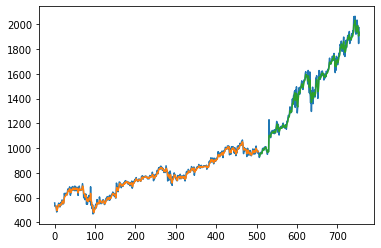

In [31]:
# plot baseline and predictions
plt.plot(dataset + df_data[1:])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


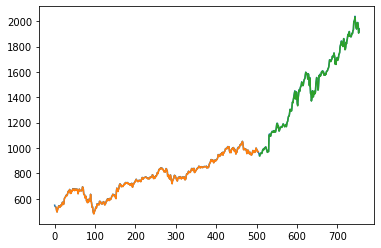

In [32]:
# plot baseline and predictions
plt.plot(dataset + df_data[:-1])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()